# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Aulia Verent Amriawati
- Email: aulia.verent@gmail.com
- Id Dicoding:a_verent

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dalam dalam beberapa tahun terakhir?
- Apakah cuaca mempengaruhi jumlah penyewa sepeda?
- Bagaimana pola penggunaan sepeda berdasarkan waktu (workingday, holiday, dan weekday)?
- Apakah musim mempengaruhi penyewa sepeda berdasarkan pelanggan Casual dan Registered?
- Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari?


## Import the Libraries

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data
mengumpulkan data dengan mengimpor file day.csv dan hr.csv pada dataset Bike Sharing Dataset

#### Load tabel day

In [208]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load tabel hour

In [209]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

1. memeriksa tipe data

In [210]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Kolom dteday seharusnya direpresentasikan sebagai tipe data datetime
- mengubah nama pada beberapa kolom

2. Memeriksa missing values

In [211]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing values pada tabel day_df

3. Memeriksa duplikasi

In [212]:
print("Jumlah duplikasi:",day_df.duplicated().sum())

Jumlah duplikasi: 0


4. memeriksa nilai statistik

In [213]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada keanehan nilai pada day_df

#### Menilai data hour_df

1. memeriksa tipe data

In [214]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Kolom dteday seharusnya direpresentasikan sebagai tipe data datetime
- mengubah nama pada beberapa kolom

2. Memeriksa missing values

In [215]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing values pada tabel hour_df

3. Memeriksa duplikasi

In [216]:
print("Jumlah duplikasi:",hour_df.duplicated().sum())

Jumlah duplikasi: 0


4. memeriksa nilai statistik

In [217]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada keanehan nilai pada hour_df

### Cleaning Data

#### Mengubah nama kolom

In [218]:
day_df = day_df.rename(columns={
                    'weathersit':'weather',
                    'yr':'year',
                    'mnth':'month',
                    'hr':'hour',
                    'hum':'humidity',
                    'cnt':'count'
})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah tipe data menjadi datetime

In [219]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah int menjadi category

In [220]:
cols = ['season','year','month','holiday','weekday','workingday','weather']

for col in cols:
   day_df[col] = day_df[col].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

#### Mengubah nilai menjadi keterangan

In [221]:
#mengubah weekday
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [222]:
#mengubah month
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [223]:
#mengubah year
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [224]:
#Mengubah season
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [225]:
#Mengubah weather
day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah nilai temp, atemp, humidity dan windspeed sebelum dinormalisasi

In [226]:
day_df['temp']=day_df['temp']*41
day_df['atemp']=day_df['atemp']*50
day_df['humidity']=day_df['humidity']*100
day_df['windspeed']=day_df['windspeed']*67
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

1. Jumlah penyewa sepeda berdasarkan bulan

In [227]:
day_df.groupby(by="month", observed=True).agg({
    'count':['max','min','mean','sum']
})

count                           
        max   min         mean     sum
month                                 
Jan    4521   431  2176.338710  134933
Feb    5062  1005  2655.298246  151352
Mar    8362   605  3692.258065  228920
Apr    7460   795  4484.900000  269094
May    8294  2633  5349.774194  331686
Jun    8120  3767  5772.366667  346342
Jul    8173  3285  5563.677419  344948
Aug    7865  1115  5664.419355  351194
Sep    8714  1842  5766.516667  345991
Oct    8156    22  5199.225806  322352
Nov    6852  1495  4247.183333  254831
Dec    6606   441  3403.806452  211036

Berdasarkan hasil tersebut, bulan Juni memiliki jumlah penyewa terbanyak dan rata-rata terbesar. Sedangkan bulan Januari memiliki jumlah penyewa paling sedikit dan rata-rata terkecil

2. Jumlah penyewa sepeda berdasarkan cuaca

In [228]:
day_df.groupby(by="weather",observed=True).agg({
    'count':['max','min','mean','sum']
})

count                           
                      max  min         mean      sum
weather                                             
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

Berdasarkan hasil tersebut, pelanggan cenderung menyewa sepeda pada saat cuaca sedang cerah. Saat hujan ringan atau salju ringan, jumlah penyewa sepeda sangat sedikit bahkan tidak ada yang menyewa sepeda ketika cuaca sedang hujan lebat atau badai.

3. Jumlah penyewa sepeda berdasarkan holiday

In [229]:
day_df.groupby(by='holiday',observed=True).agg({
    'count':['max','min','mean','sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil tersebut, pelanggan cenderung menyewa sepeda pada hari biasa, bukan saat hari libur.

4. Jumlah penyewa sepeda berdasarkan working day

In [230]:
day_df.groupby(by='workingday',observed=True).agg({
    'count':['max','min','mean','sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

berdasarkan hasil tersebut, pelanggan cenderung menyewa sepeda pada hari kerja.

5. Jumlah penyewa sepeda berdasarkan season

In [231]:
day_df.groupby(by='season',observed=True).agg({
   'count':['max','min','mean','sum']
})

count                            
         max   min         mean      sum
season                                  
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Fall    8714  1115  5644.303191  1061129
Winter  8555    22  4728.162921   841613

Berdasarkan hasil tersebut, penyewa sepeda cenderung menyewa sepeda pada musim gugur. Hal ini dapat dilihat rata-rata jumlah penyewa sepeda terbesar pada musim gugur. Sedangkan pada musim semi memiliki rata-rata yang terkecil.

6. Jumlah penyewa sepeda berdasarkan weekday

In [232]:
day_df.groupby(by='weekday',observed=True).agg({
   'count':['max','min','mean','sum']
})

count                           
          max   min         mean     sum
weekday                                 
Sun      8227   605  4228.828571  444027
Mon      7525    22  4338.123810  455503
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048
Thu      7804   431  4667.259615  485395
Fri      8362  1167  4690.288462  487790
Sat      8714   627  4550.542857  477807

Berdasarkan hasil tersebut, jumat merupakan hari dengan jumlah rata-rata penyewa sepeda terbanyak dibandingkan hari lainnya. 

7. Jumlah penyewa sepeda berdasarkan tahun

In [233]:
day_df.groupby(by='year',observed=True).agg({
   'count':['max','min','mean','sum']
})

count                           
       max  min         mean      sum
year                                 
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

### Explore Data hour_df

1. Jumlah penyewa sepeda berdasarkan jam

In [234]:
hour_df.groupby(by='hr').agg({
    'cnt':['max','min','mean','sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

Berdasarkan hasil diatas, tengah malam hingga dini hari merupakan waktu dengan jumlah penyewa sepeda paling sedikit. Penggunaan sepeda mulai meningkat pada pagi hari dan mencapai puncaknya pada pukul 08.00. Setelah itu, penggunaan sepeda berkurang pada siang hari. Namun pada sore hari, penggunaan sepeda kembali meningkat yaitu mulai pukul 16.00 dan mengalami puuncaknya pada pukul 17.00. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda pada tahun 2011 dan 2012?

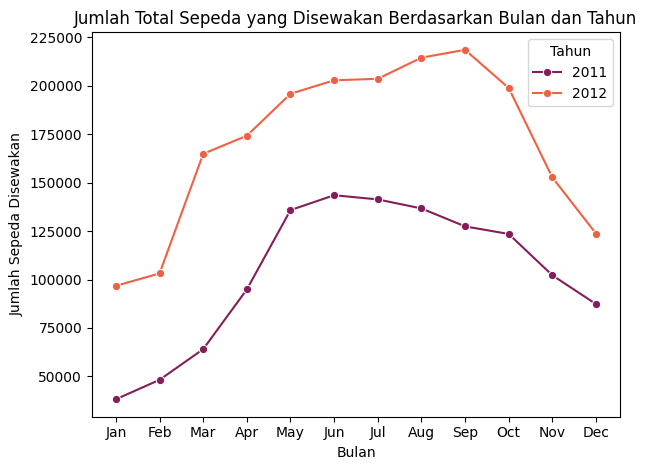

In [235]:
# Menghitung jumlah total sepeda yang disewakan per bulan dan tahun
monthly_counts = day_df.groupby(by=["month", "year"],observed=True).agg({
    "count": "sum"
}).reset_index()

# Membuat line plot menggunakan seaborn
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o"
)

# Menambahkan judul dan label sumbu
plt.title("Jumlah Total Sepeda yang Disewakan Berdasarkan Bulan dan Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sepeda Disewakan")

# Menambahkan legenda
plt.legend(title="Tahun",loc="upper right")

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data tersebut, jumlah penyewa sepeda pada tahun 2012 lebih tinggi dibandingkan pada tahun 2011. Terlihat bahwa pada awal tahun, baik pada tahun 2011 maupun tahun 2012, jumlah penyewa sepeda menunjukkan angka terendah.Pada tahun 2012, puncak jumlah penyewaan sepeda terjadi pada bulan September, sementara pada tahun 2011 puncaknya terjadi pada bulan Juni.

### Pertanyaan 2: Apakah cuaca mempengaruhi jumlah penyewa sepeda?

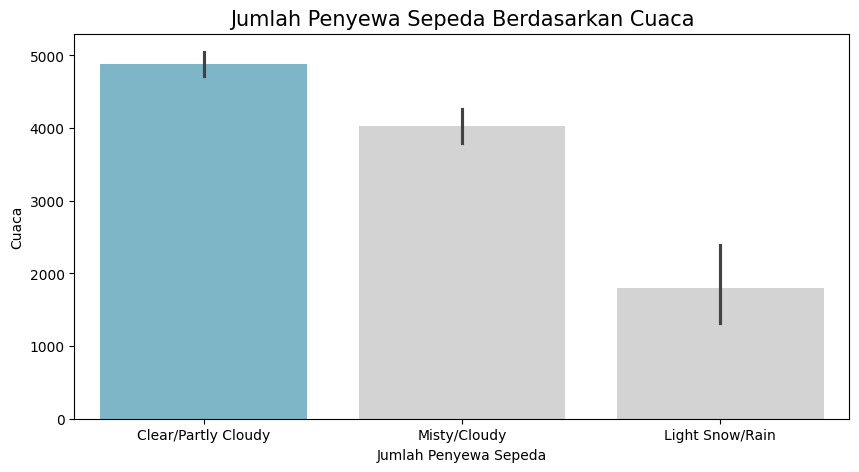

In [236]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count", 
    x="weather",
    hue="weather",
    data=day_df.sort_values(by="count", ascending=False),
    palette=colors,
    legend=False
)

plt.title("Jumlah Penyewa Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Cuaca")
plt.xlabel("Jumlah Penyewa Sepeda")
plt.tick_params(axis='x', labelsize=10)
plt.show()



Berdasarkan visualisasi tersebut dapat disimpulkan bahwa kondisi cuaca memengaruhi jumlah penyewa sepeda. Khususnya, kondisi cuaca cerah atau sedikit berawan lebih disukai oleh penyewa sepeda, seiring dengan peningkatan jumlah penyewaan pada kondisi tersebut. Sedangkan cuaca sedikit salju/hujan kurang disukai oleh penyewa sepeda. Pada kondisi ini, terlihat penurunan jumlah penyewaan sepeda, menunjukkan bahwa kondisi cuaca yang tidak ideal dapat mengurangi minat penyewaan. Pada kondisi cuaca hujan lebat tidak ada penyewa sepeda yang ingin menyewa sepeda.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda berdasarkan waktu (workingday, holiday, dan weekday)?

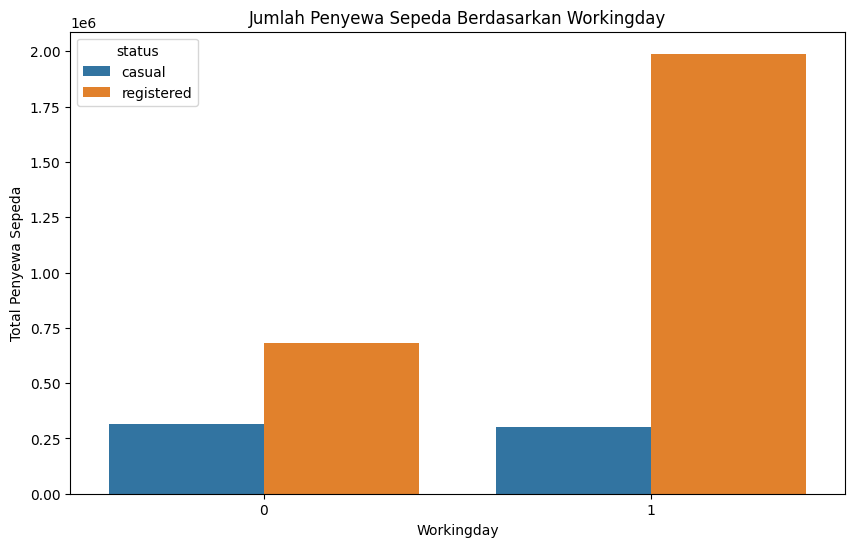

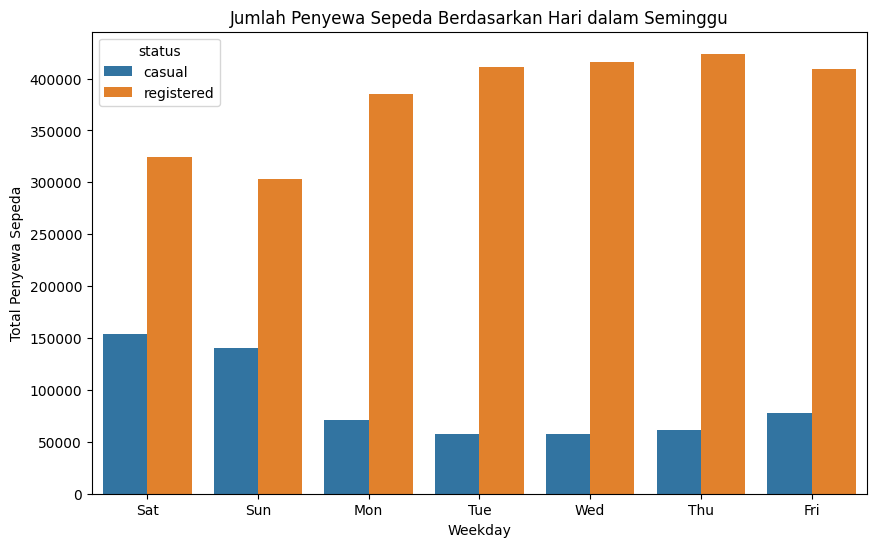

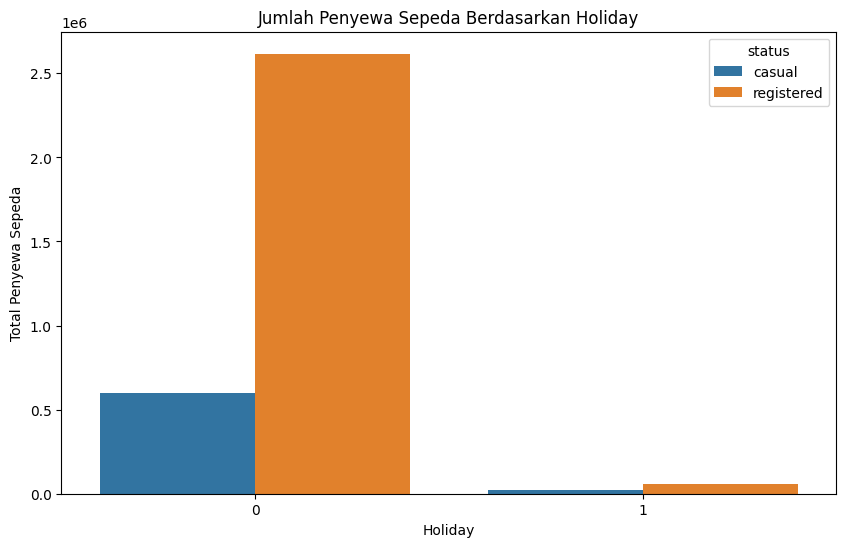

In [237]:
#Berdasarkan workingday
workingday_users_df = day_df.groupby("workingday",observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

workingday_users_df

workingday_users_df = workingday_users_df.reset_index()
workingday_users_df

workingday_users_df_unpivoted = pd.melt(workingday_users_df,
                                      id_vars=['workingday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='jumlah')

workingday_users_df_unpivoted

plt.figure(figsize=(10,6))

sns.barplot(x='workingday', y='jumlah', data=workingday_users_df_unpivoted, order=day_df['workingday'], hue='status')

plt.xlabel("Workingday")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Workingday")

plt.show()

#Berdasarkan weekday
weekday_users_df = day_df.groupby("weekday",observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

weekday_users_df

weekday_users_df = weekday_users_df.reset_index()
weekday_users_df

weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='jumlah')

weekday_users_df_unpivoted

plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='jumlah', data=weekday_users_df_unpivoted, order=day_df['weekday'], hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Hari dalam Seminggu")

plt.show()

#Berdasarkan holiday
holiday_users_df = day_df.groupby("holiday",observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

holiday_users_df

holiday_users_df = holiday_users_df.reset_index()
holiday_users_df

holiday_users_df_unpivoted = pd.melt(holiday_users_df,
                                      id_vars=['holiday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='jumlah')

holiday_users_df_unpivoted

plt.figure(figsize=(10,6))

sns.barplot(x='holiday', y='jumlah', data=holiday_users_df_unpivoted, order=day_df['holiday'], hue='status')

plt.xlabel("Holiday")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Holiday")

plt.show()

Berdasarkan hasil tersebut, pelanggan cenderung lebih memilih menyewa sepeda pada hari biasa dibandingkan dengan hari libur. Terdapat kecenderungan bahwa pelanggan lebih cenderung menyewa sepeda pada hari kerja. Hal ini dapat disebabkan oleh kebutuhan transportasi harian ke tempat kerja atau aktivitas rutin lainnya yang dilakukan pada hari kerja. Jumat merupakan hari dengan jumlah rata-rata penyewa sepeda terbanyak dibandingkan dengan hari-hari lainnya. Hal ini menunjukkan bahwa Jumat adalah hari paling populer bagi pelanggan untuk menyewa sepeda.

### Pertanyaan 4 : Apakah musim mempengaruhi jumlah penyewa sepeda? 

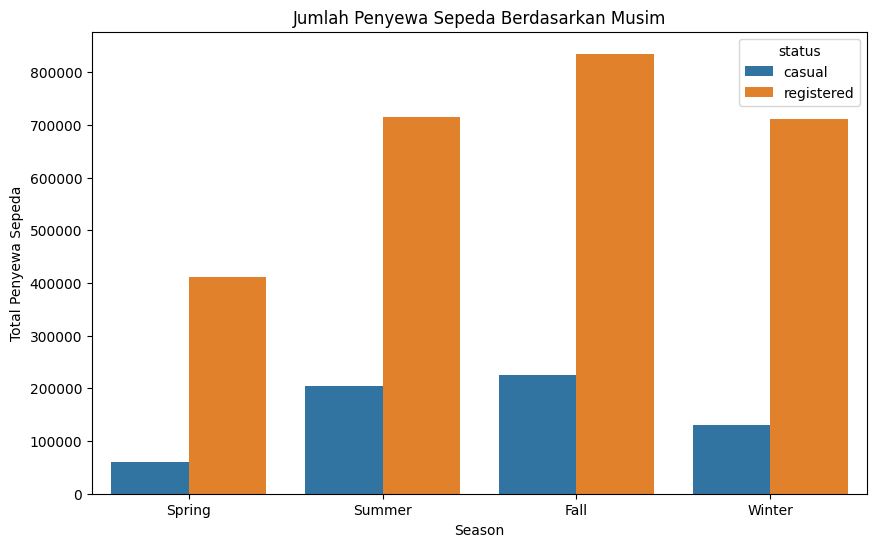

In [238]:
season_users_df = day_df.groupby("season",observed=True).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

season_users_df

season_users_df = season_users_df.reset_index()
season_users_df

season_users_df_unpivoted = pd.melt(season_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='jumlah')

season_users_df_unpivoted

plt.figure(figsize=(10,6))

sns.barplot(x='season', y='jumlah', data=season_users_df_unpivoted, order=day_df['season'], hue='status')

plt.xlabel("Season")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Musim")

plt.show()

Berdasarkan visualisasi tersebut, pelanggan baik casual maupun registered lebih menyukai bersepeda pada musim gugur. Sebaliknya, jumlah penyewaan sepeda paling sedikit terjadi pada musim semi. Hal ini dapat disebabkan oleh berbagai faktor, termasuk kondisi cuaca atau preferensi pelanggan yang berubah selama musim tersebut. tidak terlihat perbedaan signifikan dalam pola preferensi bersepeda antara pengguna casual dan pengguna terdaftar. Kedua kelompok pengguna menunjukkan kecenderungan yang serupa dalam memilih musim gugur sebagai waktu favorit untuk bersepeda.

### Pertanyaan 5: Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari? 

Text(0.5, 0, 'Hour')

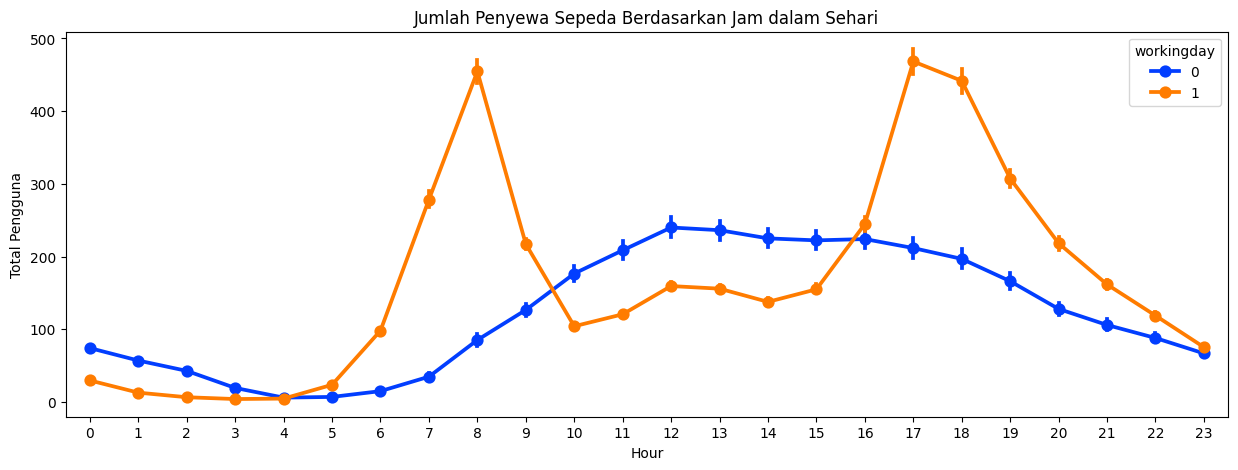

In [239]:
fig, ax = plt.subplots(figsize=(15,5))

sns.pointplot(
    data=hour_df, 
    x='hr', 
    y='registered', 
    hue='workingday', 
    ax=ax,
    palette="bright"
)
ax.set(title='Jumlah Penyewa Sepeda Berdasarkan Jam dalam Sehari')
ax.set_ylabel('Total Pengguna')
ax.set_xlabel('Hour')



Berdasarkan visualisasi tersebut, terdapat perbedaan pola yang signifikan antara hari kerja (weekday) dan akhir pekan (weekend) dalam hal jumlah penyewa sepeda. Pada hari kerja, puncak jumlah penyewa sepeda terjadi pada pukul 08.00 dan pada pukul 17.00. Peningkatan aktivitas ini dapat dihubungkan dengan kebutuhan transportasi untuk pergi ke tempat kerja atau pulang dari tempat kerja. Pada kedua waktu tersebut, terlihat lonjakan signifikan dalam jumlah penyewaan. Sedangkan pada saat weekend, jumlah penyewa sepeda menunjukkan frekuensi yang lebih tinggi pada siang hari.

### RFM Analysis

In [240]:
rfm_df = day_df.groupby(by="weekday",observed=True, as_index=False).agg({
    "dteday": "max", 
    "instant": "nunique", 
    "count": "sum" 
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

#Customer terakhir melakukan transaksi(hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,weekday,frequency,monetary,recency
0,Sun,105,444027,1
1,Mon,105,455503,0
2,Tue,104,469109,6
3,Wed,104,473048,5
4,Thu,104,485395,4
5,Fri,104,487790,3
6,Sat,105,477807,2


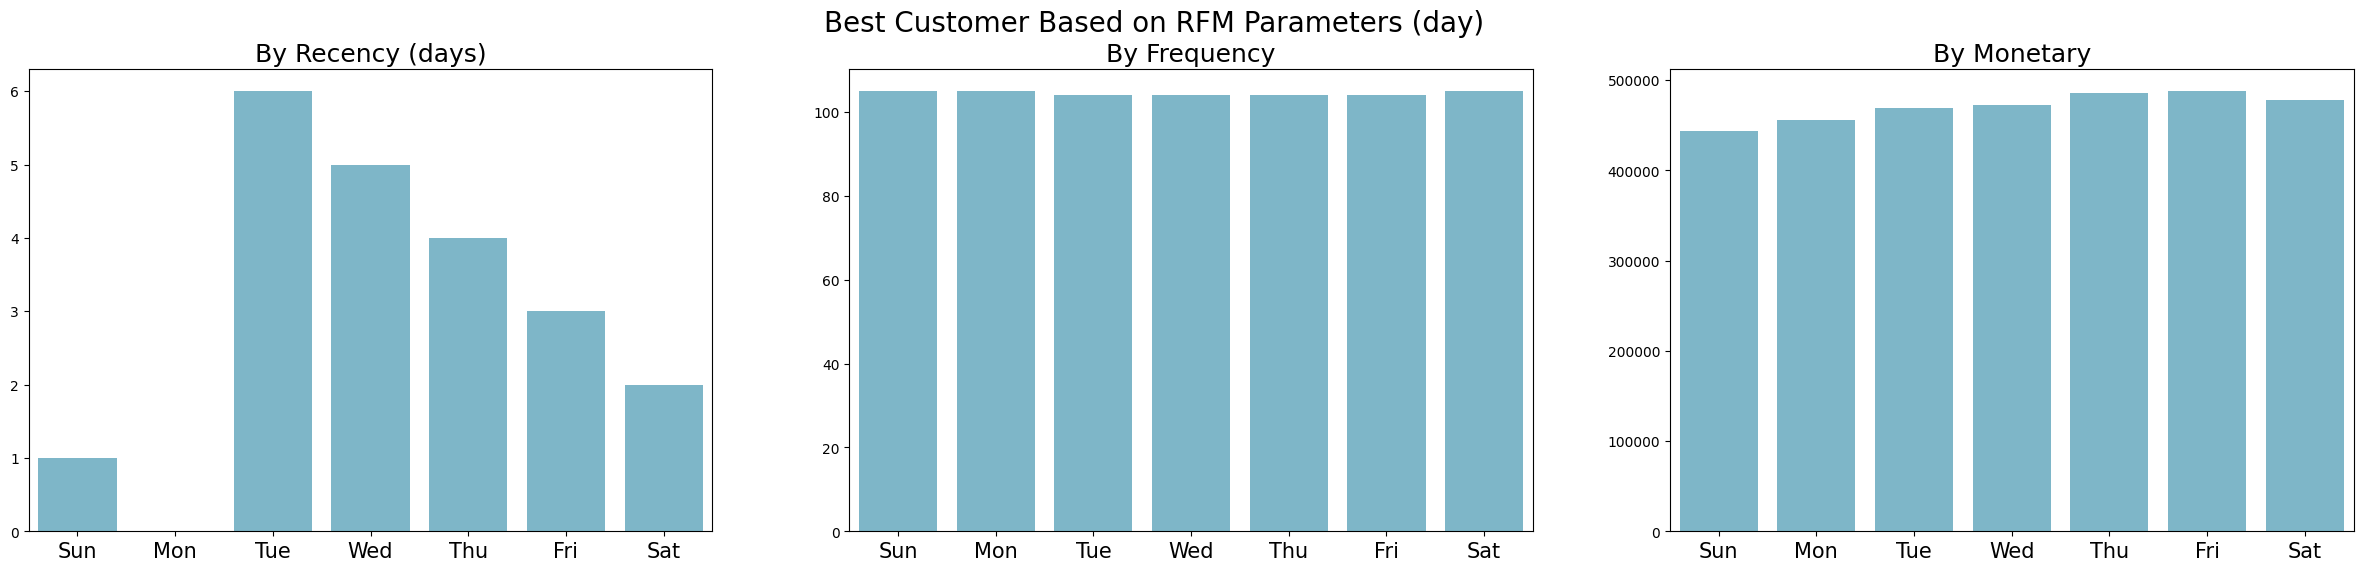

In [241]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4","#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(7), palette=colors, hue="weekday", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(7), palette=colors, hue="weekday", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="weekday", data=rfm_df.sort_values(by="monetary", ascending=False).head(7), palette=colors, hue="weekday", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()

## Conclusion

- Jumlah penyewa sepeda pada tahun 2012 lebih tinggi dibandingkan pada tahun 2011. Pada awal tahun, baik pada tahun 2011 maupun tahun 2012, jumlah penyewa sepeda menunjukkan angka terendah.Pada tahun 2012, puncak jumlah penyewaan sepeda terjadi pada bulan September, sementara pada tahun 2011 puncaknya terjadi pada bulan Juni.
- kondisi cuaca memengaruhi jumlah penyewa sepeda. Khususnya, kondisi cuaca cerah atau sedikit berawan lebih disukai oleh penyewa sepeda, seiring dengan peningkatan jumlah penyewaan pada kondisi tersebut. Hal ini mungkin dikaitkan dengan kenyamanan dan keamanan berkendara di kondisi cuaca yang cerah.
- Pelanggan cenderung lebih memilih menyewa sepeda pada hari kerja dan bukan hari libur. Hal ini dapat disebabkan oleh kebutuhan transportasi harian ke tempat kerja atau aktivitas rutin lainnya yang dilakukan pada hari kerja. Jumat merupakan hari dengan jumlah rata-rata penyewa sepeda terbanyak dibandingkan dengan hari-hari lainnya.
- Baik pelanggan casual maupun pelanggan terdaftar (registered) menunjukkan kecenderungan yang tinggi untuk menyewa sepeda pada musim gugur. Sebaliknya, musim semi menunjukkan jumlah penyewaan sepeda paling rendah. Namun, tidak terlihat perbedaan yang signifikan dalam pola preferensi bersepeda antara pengguna casual dan pengguna terdaftar.
- Terdapat perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan. Pada hari kerja, puncak aktivitas terjadi pada pukul 08.00 dan 17.00, mencerminkan kebutuhan transportasi untuk pergi dan pulang dari tempat kerja. Di akhir pekan, frekuensi penyewaan lebih tinggi pada siang hari.